In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the CSV data into a DataFrame
# data_labels = ['erc20_[]', 'erc20_[20]', 'erc20_[721_1155]', 'erc_20_[721]', 'erc_20_[1155]']
df = pd.read_csv('erc721_[].csv')
df2 = pd.read_csv('erc721_[20_1155].csv')
df3 = pd.read_csv('erc721_[20].csv')
df4 = pd.read_csv('erc721_[721_20_1155].csv')
df5 = pd.read_csv('erc721_[721_20].csv')
df6 = pd.read_csv('erc721_[721_1155].csv')
df7 = pd.read_csv('erc721_[721].csv')


methods = {
        'balanceOf': [],
        'ownerOf': [],
        'approve': [],
        'getApproved': [],
        'setApprovalForAll': [],
        'isApprovedForAll': [],
        'transferFrom': [],
        'safeTransferFrom': []

    }


In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

In [ ]:
# Count of verified vs. not verified
print("\nCount of Verified vs. Not Verified:")
print(df['verified'].value_counts())

In [ ]:
# Average time taken for verified and not verified runs
print("\nAverage Time Taken for Verified and Not Verified Runs (minutes:seconds):")
print(df.groupby('verified')['time_taken'].mean())

In [ ]:
# Number of iterations for verified and not verified runs
print("\nAverage Iterations for Verified and Not Verified Runs:")
print(df.groupby('verified')['iterations'].mean().round())

In [13]:
def parse_status_logs(log):
    parsed_logs = {}
    if log:
        try:
            # Manually split the logs and process each entry
            log_list = log.strip('[]').split('", "')
            for entry in log_list:
                interaction_logs = entry.split('\\n')
                interaction_number = None
                for interaction_log in interaction_logs:
                    if 'Iteraction:' in interaction_log:
                        interaction_number = int(interaction_log.split(': ')[1])
                    if 'OK' in interaction_log or 'ERROR' in interaction_log:
                        parts = interaction_log.split(': ')
                        method = parts[0].split('::')[1]
                        status = parts[1].strip()
                        if interaction_number is not None:
                            if status == 'OK':
                                parsed_logs[method] = parsed_logs.get(method, interaction_number)
        except Exception as e:
            print(f"Error parsing log: {e}")
    return parsed_logs

def merge(rounds_logs, verified, interaction):
    result = []
    for idx, round_dict in enumerate(rounds_logs):
        if not verified[idx]:
            result.append(round_dict)
        else:
            verified_dict = {}
            for method_name in methods.keys():
                verified_dict[method_name] = interaction[idx]

            merged_dict = verified_dict.copy()
            merged_dict.update(round_dict)
            result.append(merged_dict)
    return result


# Apply the parse_status_logs function to each row's status column
df['parsed_status'] = df['status'].apply(parse_status_logs)
data1 = merge(df['parsed_status'].tolist(), df['verified'].to_list(), df['iterations'].to_list())

df2['parsed_status'] = df2['status'].apply(parse_status_logs)
data2 = merge(df2['parsed_status'].tolist(), df2['verified'].to_list(), df2['iterations'].to_list())
df3['parsed_status'] = df3['status'].apply(parse_status_logs)
data3 = merge(df3['parsed_status'].tolist(), df3['verified'].to_list(), df3['iterations'].to_list())
df4['parsed_status'] = df4['status'].apply(parse_status_logs)
data4 = merge(df4['parsed_status'].tolist(), df4['verified'].to_list(), df4['iterations'].to_list())
df5['parsed_status'] = df5['status'].apply(parse_status_logs)
data5 = merge(df5['parsed_status'].tolist(), df5['verified'].to_list(), df5['iterations'].to_list())
df6['parsed_status'] = df6['status'].apply(parse_status_logs)
data6 = merge(df6['parsed_status'].tolist(), df6['verified'].to_list(), df6['iterations'].to_list())
df7['parsed_status'] = df7['status'].apply(parse_status_logs)
data7 = merge(df7['parsed_status'].tolist(), df7['verified'].to_list(), df7['iterations'].to_list())

# print("\nParsed Status:")
# print(data)
print(data2)


[{'balanceOf': 1, 'ownerOf': 1, 'approve': 1, 'getApproved': 1, 'setApprovalForAll': 1, 'isApprovedForAll': 1, 'transferFrom': 1, 'safeTransferFrom': 1, 'supportsInterface': 1, '[constructor]': 1, '[implicit_constructor]': 1}, {'balanceOf': 1, 'ownerOf': 1, 'approve': 1, 'getApproved': 1, 'setApprovalForAll': 1, 'isApprovedForAll': 1, 'transferFrom': 1, 'safeTransferFrom': 1, 'supportsInterface': 1, '[constructor]': 1, '[implicit_constructor]': 1}, {}, {'supportsInterface': 1, '[constructor]': 1, 'balanceOf': 1, 'ownerOf': 1, 'getApproved': 1, 'setApprovalForAll': 1, 'isApprovedForAll': 1, 'safeTransferFrom': 1, '[implicit_constructor]': 1, 'transferFrom': 3}, {'supportsInterface': 1, '[constructor]': 1, 'balanceOf': 1, 'ownerOf': 1, 'approve': 1, 'getApproved': 1, 'setApprovalForAll': 1, 'isApprovedForAll': 1, 'safeTransferFrom': 1, '[implicit_constructor]': 1}, {'balanceOf': 1, 'ownerOf': 1, 'approve': 1, 'getApproved': 1, 'setApprovalForAll': 1, 'isApprovedForAll': 1, 'transferFrom'

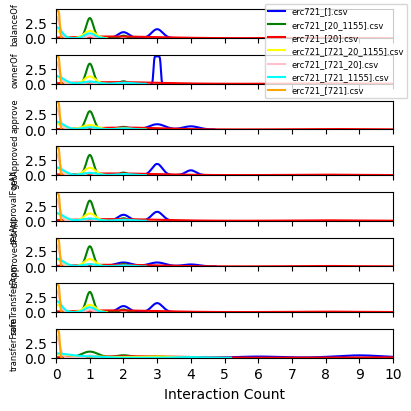

In [14]:
# Function to extract interaction counts for each method
def extract_counts(data, plus=0):
    methods_local = {}
    for entry in data:
        for method in methods.keys():
            if method in entry:
                iteration_list = methods_local.get(method, [])
                iteration_list.append(entry[method] + plus)
                methods_local[method] = iteration_list
    return methods_local


# Extract counts for each configuration
methods1 = extract_counts(data1)
methods2 = extract_counts(data2)
methods3 = extract_counts(data3)
methods4 = extract_counts(data4)
methods5 = extract_counts(data5)
methods6 = extract_counts(data6)
methods7 = extract_counts(data7)

# Plot KDE plots with different colors for each configuration
fig, axs = plt.subplots(len(methods1), figsize=(4, 4), sharex=True, constrained_layout=True)

# Function to plot KDE or fixed artificial distribution
def plot_kde_or_fixed_distribution(data, ax, color, label):
    unique_vals = np.unique(data)
    if len(unique_vals) == 1:
        mean_val = unique_vals[0]
        # Create a fixed artificial distribution centered at the mean value
        fixed_data = np.linspace(mean_val - 0.1, mean_val + 0.1, 10)
        sns.kdeplot(fixed_data, ax=ax, bw_adjust=0.5, color=color, label=label)
    else:
        sns.kdeplot(data, ax=ax, bw_adjust=0.5, color=color, label=label)

colors = ['blue', 'green', 'red', 'yellow', 'pink', 'cyan', 'orange']
data_labels = ['erc721_[].csv', 'erc721_[20_1155].csv', 'erc721_[20].csv', 'erc721_[721_20_1155].csv', 'erc721_[721_20].csv', 'erc721_[721_1155].csv', 'erc721_[721].csv']


all_methods = list(methods1.keys())

for i, method in enumerate(all_methods):
    plot_kde_or_fixed_distribution(np.array(methods1[method]), ax=axs[i], color=colors[0], label=data_labels[0] if i == 1 else "")
    plot_kde_or_fixed_distribution(np.array(methods2[method]), ax=axs[i], color=colors[1], label=data_labels[1] if i == 1 else "")
    plot_kde_or_fixed_distribution(np.array(methods3[method]), ax=axs[i], color=colors[2], label=data_labels[2] if i == 1 else "")
    plot_kde_or_fixed_distribution(np.array(methods4[method]), ax=axs[i], color=colors[3], label=data_labels[3] if i == 1 else "")
    plot_kde_or_fixed_distribution(np.array(methods5[method]), ax=axs[i], color=colors[4], label=data_labels[4] if i == 1 else "")
    plot_kde_or_fixed_distribution(np.array(methods6[method]), ax=axs[i], color=colors[5], label=data_labels[5] if i == 1 else "")
    plot_kde_or_fixed_distribution(np.array(methods7[method]), ax=axs[i], color=colors[6], label=data_labels[6] if i == 1 else "")
    
    axs[i].set_ylabel(method, fontsize=6)
    axs[i].set_xlim(0, 10)
    axs[i].set_xticks(range(11))
    # if i == 0:
    #     axs[i].legend()
# Create a single legend for the entire figure
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=6)

# Set x-label for the bottom subplot
axs[-1].set_xlabel('Interaction Count')

plt.show()

In [10]:
# Create a dictionary to hold the data for plotting
plot_data = {}

# Extract data for plotting
for parsed_log in df['parsed_status']:
    for interaction, methods in parsed_log.items():
        if interaction not in plot_data:
            plot_data[interaction] = {}
        for method, status in methods.items():
            if method not in plot_data[interaction]:
                plot_data[interaction][method] = status

# Create a DataFrame from the plot data
plot_df = pd.DataFrame.from_dict(plot_data, orient='index')

# Convert 'OK'/'ERROR' to numerical values (OK = 1, ERROR = 0)
plot_df = plot_df.applymap(lambda x: 1 if x == 'OK' else 0)

# Sort the DataFrame by interaction numbers
plot_df = plot_df.sort_index()

# Plot a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(plot_df.T, cmap='coolwarm', cbar_kws={'ticks': [0, 1]}, annot=True, fmt='d')
plt.xlabel('Interaction Number')
plt.ylabel('Function')
plt.title('Evolution of Function Status Over Interactions')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

AttributeError: 'int' object has no attribute 'items'

In [ ]:
# Plot the distribution of time taken
plt.figure(figsize=(10, 5))
df['time_taken'].hist(bins=10)
plt.title('Distribution of Time Taken')
plt.xlabel('Time Taken (seconds)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot the distribution of iterations
plt.figure(figsize=(10, 5))
df['iterations'].hist(bins=10)
plt.title('Distribution of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot the average time taken for verified vs. not verified runs
avg_time_taken = df.groupby('verified')['time_taken'].mean()
print(avg_time_taken)

In [ ]:
# Plot the average iterations for verified vs. not verified runs
avg_iterations = df.groupby('verified')['iterations'].mean()
print(avg_iterations)